In [30]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial import distance

In [31]:
path="/Users/user/Desktop/练习用jupyter notebook/"
data=path+"profile_list.csv"

In [32]:
df1 = pd.read_csv(data, index_col=0)
df=df1.loc[ : , ~df1.columns.str.contains('Unnamed')]

In [33]:
def annotate_organisms(): # 生物分類の色つけ
    with open(path + 'KeggOrganisms/vertebrates.txt', 'r', encoding='utf-8') as ver,\
    open(path + 'KeggOrganisms/other_animals.txt', 'r', encoding='utf-8') as oth,\
    open(path + 'KeggOrganisms/plants.txt', 'r', encoding='utf-8') as pla,\
    open(path + 'KeggOrganisms/fungi.txt', 'r', encoding='utf-8') as fun,\
    open(path + 'KeggOrganisms/protists.txt', 'r', encoding='utf-8') as pro:
        vertebrates = ver.read().splitlines()
        other_animals = oth.read().splitlines()
        plants = pla.read().splitlines()
        fungi = fun.read().splitlines()
        protists = pro.read().splitlines()
    li=[]
    organ = df.columns
    organlist=pd.DataFrame({'Eukaryotes':organ})
    ver=0
    oth=0
    pla=0
    fun=0
    pro=0
    for i in organlist['Eukaryotes']:
        if i in vertebrates:
            li.append('#0000FF') #bule
            ver+=1
        elif i in other_animals:
            li.append('#FF0000') #red
            oth+=1
        elif i in plants:
            li.append('#9ACD32') #yellowgreen
            pla+=1
        elif i in fungi:
            li.append('#FFFF00') #yellow
            fun+=1
        elif i in protists:
            li.append('#745399') #江戸紫
            pro+=1
    print('--- Num of organisms ---')
    print('vertebrates\t', ver, '\n'\
          'other_animals\t', oth, '\n'\
          'plants\t', pla, '\n'\
          'fungi\t', fun, '\n'\
          'protists\t', pro)
    organlist['eukaryotes'] = li
    return organlist.set_index('Eukaryotes') # はじめの列をindexへ
organisms_color = annotate_organisms()

--- Num of organisms ---
vertebrates	 329 
other_animals	 201 
plants	 138 
fungi	 154 
protists	 56


In [34]:
threshold =25 #グループ１,400# クラスタリング閾値
row_linkage = linkage(distance.pdist(df), metric='euclidean', method="ward", optimal_ordering=True)
#col_linkage = linkage(distance.pdist(df.T), metric='euclidean', method="ward", optimal_ordering=True)
color_dict = {1:'pink', 2:'deepskyblue', 3:'lawngreen', 4:'gold',\
                    5:'orange', 6:'black', 7:'slategray'}
col_label = fcluster(row_linkage,threshold,criterion='distance')
col_list = []
for i in col_label:
    col_list.append(color_dict[i])

C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


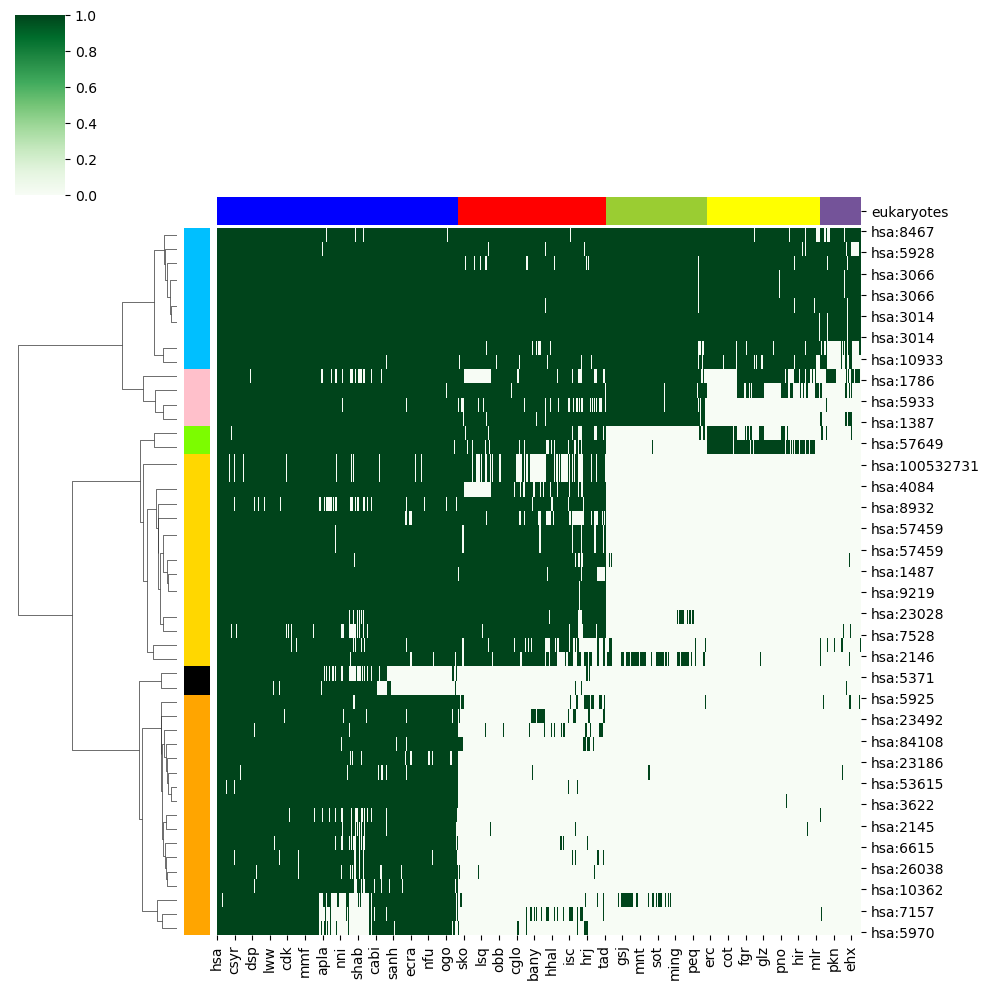

In [35]:
result=sns.clustermap(data=df,col_colors=organisms_color,row_colors=col_list,method="ward",metric='euclidean',cmap=plt.get_cmap('Greens'),col_cluster = False)

In [36]:
#plt.savefig(path + 'clustered_LI_2.png', dpi=900)
#print("over")

In [37]:
file={'KEGG_ID':df.index,'culster':col_label}
af_df=pd.DataFrame(file)
af_df.to_csv("/Users/user/Desktop/练习用jupyter notebook//profile_result/class.csv")
print("over")

over
